In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the 200-row CBC dataset
df = pd.read_csv("cbc_data_200.csv")
df.head()

,Hemoglobin,RBC,WBC,Platelets,Anemia
0,13.99,4.95,4608,287849,0
1,12.72,5.09,6101,203892,0
2,14.30,5.46,7008,293480,0
3,16.05,5.44,7070,317782,0
4,12.53,3.74,6325,270672,1


In [3]:
# General info
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hemoglobin  200 non-null    float64
 1   RBC         200 non-null    float64
 2   WBC         200 non-null    int64  
 3   Platelets   200 non-null    int64  
 4   Anemia      200 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.9 KB


,Hemoglobin,RBC,WBC,Platelets,Anemia
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,12.918400,4.760050,6871.515000,250448.355000,0.375000
std,1.861973,0.690938,1491.045571,50978.690539,0.485338
min,7.760000,2.430000,3293.000000,115156.000000,0.000000
25%,11.592500,4.275000,5809.500000,214676.750000,0.000000
50%,12.990000,4.755000,6883.500000,251113.500000,0.000000
75%,14.000000,5.180000,7858.250000,284258.750000,1.000000
max,18.440000,7.400000,11618.000000,381619.000000,1.000000


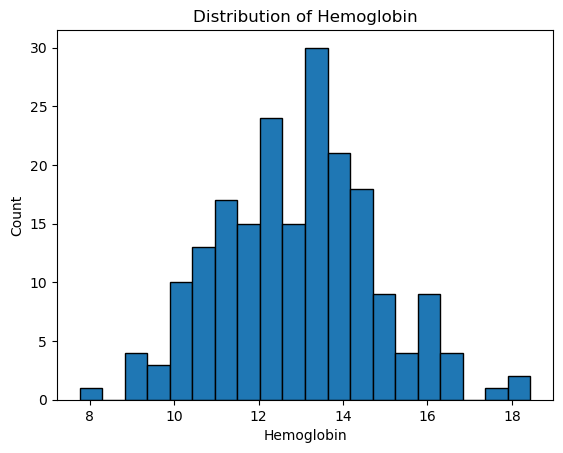

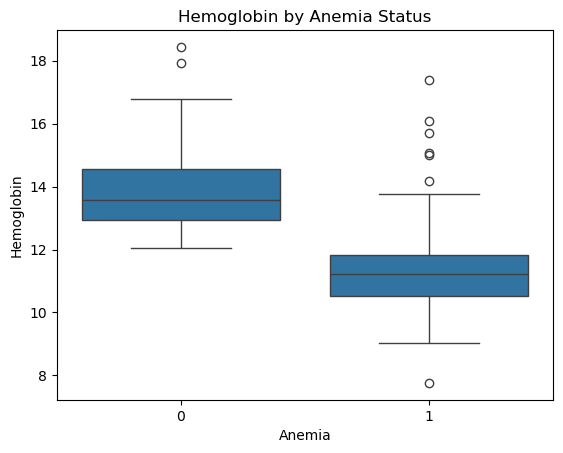

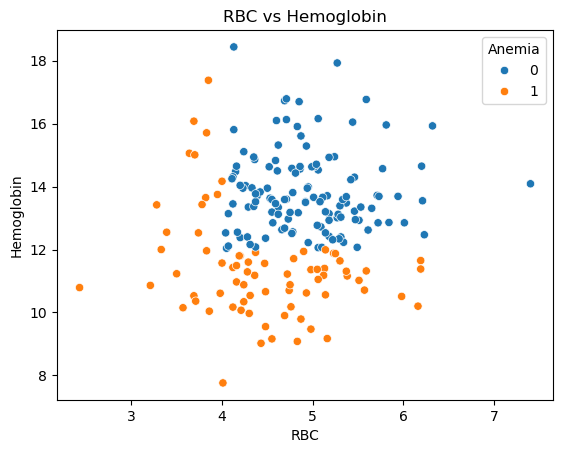

In [5]:
# Histogram of Hemoglobin
plt.hist(df['Hemoglobin'], bins=20, edgecolor='black')
plt.title("Distribution of Hemoglobin")
plt.xlabel("Hemoglobin")
plt.ylabel("Count")
plt.show()

# Boxplot grouped by Anemia
sns.boxplot(x="Anemia", y="Hemoglobin", data=df)
plt.title("Hemoglobin by Anemia Status")
plt.show()

# Scatter plot RBC vs Hemoglobin colored by Anemia
sns.scatterplot(x="RBC", y="Hemoglobin", hue="Anemia", data=df)
plt.title("RBC vs Hemoglobin")
plt.show()


In [6]:
# Features and target
X = df[["Hemoglobin", "RBC", "WBC", "Platelets"]]
y = df["Anemia"]

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [8]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy and metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.875
Confusion Matrix:
 [[23  2]
 [ 3 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.86      0.80      0.83        15

    accuracy                           0.88        40
   macro avg       0.87      0.86      0.86        40
weighted avg       0.87      0.88      0.87        40

